# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
                                                                                                                                                                          
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


# 2. Load Dataset

In [2]:
# STEP 1: Install gdown if needed
!pip install -q gdown

# STEP 2: Download from shared Google Drive link
import gdown
file_id = "14Szd6wdb5qujPkQEOEPSyZondhFZmVpH"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "combined_dataset.csv", quiet=False)

# STEP 3: Load and preview the dataset
import pandas as pd
df = pd.read_csv("combined_dataset.csv")
df.drop(columns=["domain"], inplace=True)
df.head()


Downloading...
From: https://drive.google.com/uc?id=14Szd6wdb5qujPkQEOEPSyZondhFZmVpH
To: c:\duhh\MS\winter25\IS\project\combined_dataset.csv
100%|██████████| 9.77M/9.77M [00:00<00:00, 27.3MB/s]


,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,10000000,0,0,0,20,0,0,1,20,2,1
1,194914,0,1,7305,42,0,0,0,12,2,0
2,10000000,0,0,0,155,0,0,0,14,1,1
3,7001,0,0,0,35,0,0,0,18,3,0
4,10000000,0,1,730,79,0,0,1,14,1,1


# 3. Explore Dataset

### Info's

In [3]:
print("Shape of dataset:", df.shape)
df.info()
df.describe()
print("Missing values:\n", df.isnull().sum())


Shape of dataset: (95910, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ranking         95910 non-null  int64
 1   isIp            95910 non-null  int64
 2   valid           95910 non-null  int64
 3   activeDuration  95910 non-null  int64
 4   urlLen          95910 non-null  int64
 5   is@             95910 non-null  int64
 6   isredirect      95910 non-null  int64
 7   haveDash        95910 non-null  int64
 8   domainLen       95910 non-null  int64
 9   nosOfSubdomain  95910 non-null  int64
 10  label           95910 non-null  int64
dtypes: int64(11)
memory usage: 8.0 MB
Missing values:
 ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64


### Label Distribution


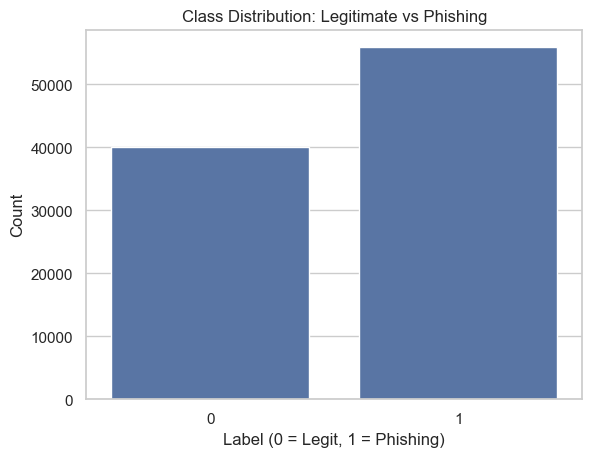

In [4]:
sns.countplot(x="label", data=df)
plt.title("Class Distribution: Legitimate vs Phishing")
plt.xlabel("Label (0 = Legit, 1 = Phishing)")
plt.ylabel("Count")
plt.show()



### Histogram of Key Features

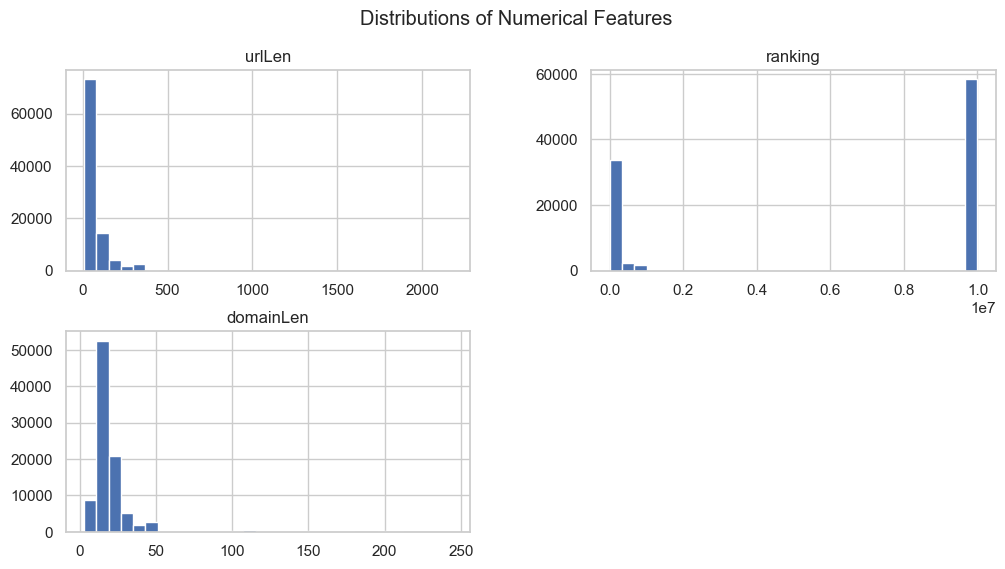

In [5]:
df[['urlLen', 'ranking', 'domainLen']].hist(figsize=(12, 6), bins=30)
plt.suptitle("Distributions of Numerical Features")
plt.show()


### Correlation Heatmap

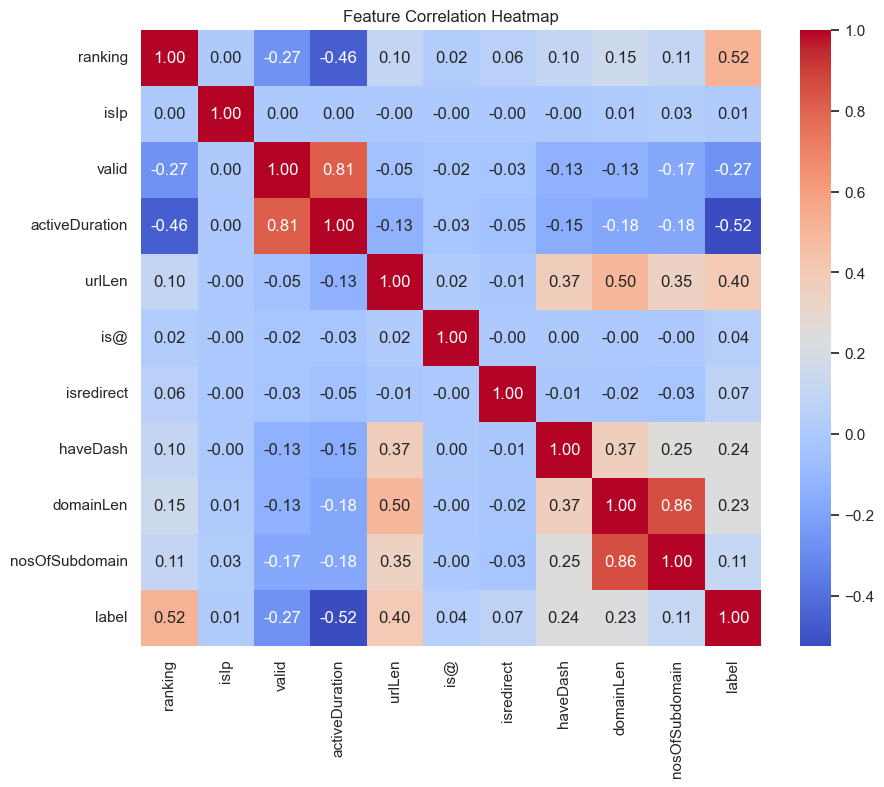

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



### Pair Plot

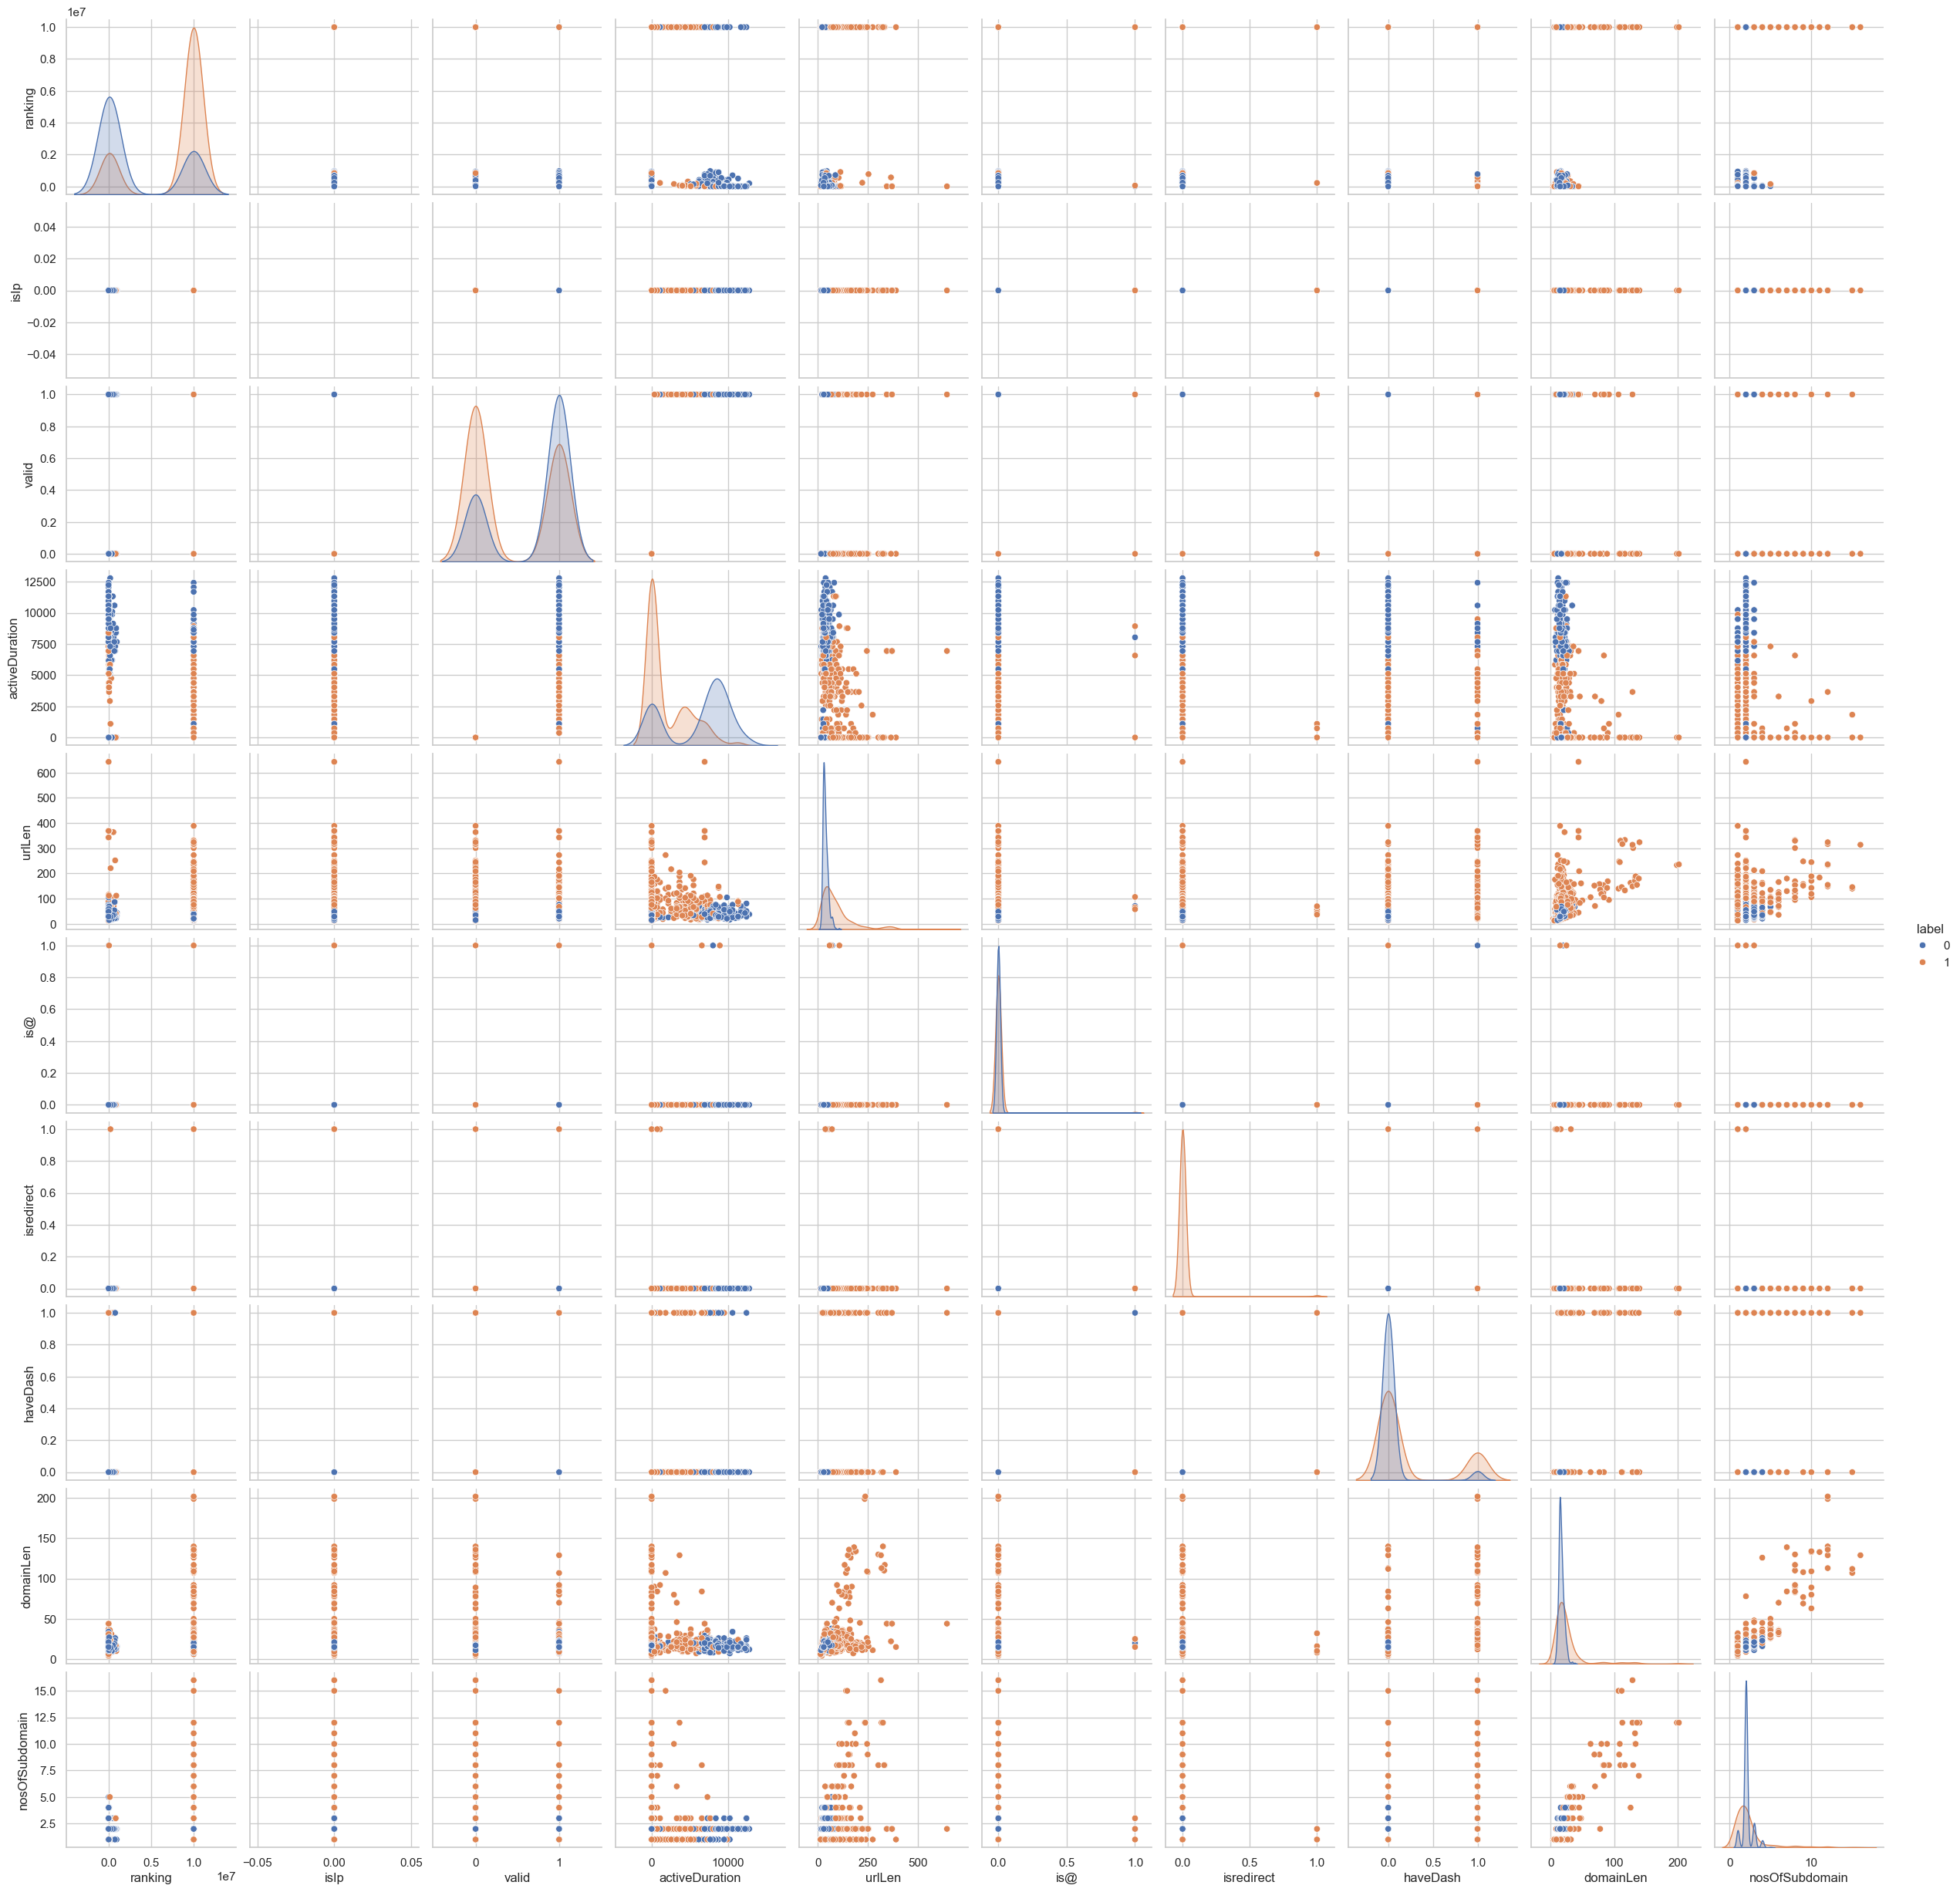

In [7]:
sns.pairplot(df.sample(1000), hue="label")


### Boxplots by Label

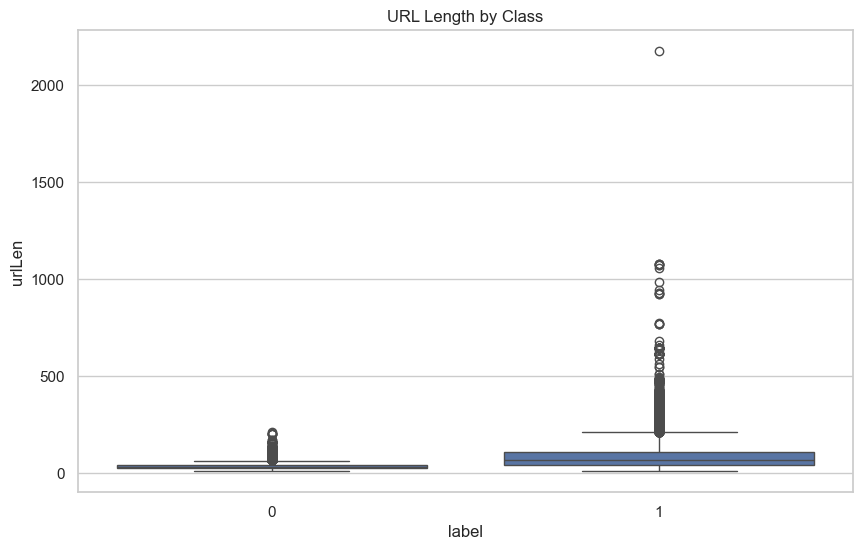

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="urlLen", data=df)
plt.title("URL Length by Class")
plt.show()


# 4. Preprocess and Train-Test Split

In [9]:
X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Evaluation Function

In [10]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


# 6. Model Training

### Logistic Regression

In [11]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate(y_test, y_pred_lr, "Logistic Regression")



=== Logistic Regression ===
Accuracy: 0.8136273589823794
Precision: 0.8122046928805958
Recall: 0.8918396060499473
F1 Score: 0.8501613646841862
Confusion Matrix:
 [[ 5465  2345]
 [ 1230 10142]]


### Decision Tree

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate(y_test, y_pred_dt, "Decision Tree")



=== Decision Tree ===
Accuracy: 0.946773016369513
Precision: 0.9595134511231466
Recall: 0.9503165670066831
F1 Score: 0.9548928650320301
Confusion Matrix:
 [[ 7354   456]
 [  565 10807]]


### Random Forest

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate(y_test, y_pred_rf, "Random Forest")



=== Random Forest ===
Accuracy: 0.9566781357522678
Precision: 0.9653863134657836
Recall: 0.9613964122405909
F1 Score: 0.963387231792748
Confusion Matrix:
 [[ 7418   392]
 [  439 10933]]


### Tuned Random Forest

In [14]:
param_grid = {'n_estimators': [100], 'max_depth': [20], 'min_samples_split': [2]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1', cv=3)
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate(y_test, y_pred_best_rf, "Tuned Random Forest")



=== Tuned Random Forest ===
Accuracy: 0.9558440204358253
Precision: 0.9660791781064565
Recall: 0.9591980302497362
F1 Score: 0.9626263071967525
Confusion Matrix:
 [[ 7427   383]
 [  464 10908]]


### XGBoost

In [15]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate(y_test, y_pred_xgb, "XGBoost")



=== XGBoost ===
Accuracy: 0.9497445521843395
Precision: 0.9559313124233397
Recall: 0.9594618360886388
F1 Score: 0.9576933204599315
Confusion Matrix:
 [[ 7307   503]
 [  461 10911]]


### Naive Bayes

In [16]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
evaluate(y_test, y_pred_nb, "Naive Bayes")



=== Naive Bayes ===
Accuracy: 0.8308309873840058
Precision: 0.8943996894108512
Recall: 0.8103236018290538
F1 Score: 0.8502883506343714
Confusion Matrix:
 [[6722 1088]
 [2157 9215]]


###  K-Nearest Neighbor

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
evaluate(y_test, y_pred_knn, "K-Nearest Neighbor")



=== K-Nearest Neighbor ===
Accuracy: 0.9363465749139819
Precision: 0.948167770419426
Recall: 0.9442490327119241
F1 Score: 0.9462043441864564
Confusion Matrix:
 [[ 7223   587]
 [  634 10738]]


### Support Vector Machine (scaled)

In [18]:
svm = SVC(kernel='rbf', probability=False)
svm.fit(X_train_scaled[:10000], y_train[:10000])  # subset for speed
y_pred_svm = svm.predict(X_test_scaled)
evaluate(y_test, y_pred_svm, "SVM (RBF, scaled, subsample)")



=== SVM (RBF, scaled, subsample) ===
Accuracy: 0.8992284433322907
Precision: 0.9168065000441579
Recall: 0.9128561378825185
F1 Score: 0.9148270544172725
Confusion Matrix:
 [[ 6868   942]
 [  991 10381]]


### Linear SVM

In [19]:
svm_linear = SGDClassifier(loss='hinge')
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear_svm = svm_linear.predict(X_test_scaled)
evaluate(y_test, y_pred_linear_svm, "Linear SVM (SGD)")



=== Linear SVM (SGD) ===
Accuracy: 0.882650401417996
Precision: 0.9163699443074956
Recall: 0.8826064016883574
F1 Score: 0.8991713325867862
Confusion Matrix:
 [[ 6894   916]
 [ 1335 10037]]


### MLP Neural Network

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)
evaluate(y_test, y_pred_mlp, "MLP Neural Network")



=== MLP Neural Network ===
Accuracy: 0.9373370868522574
Precision: 0.9395746887966805
Recall: 0.9557685543440028
F1 Score: 0.9476024411508283
Confusion Matrix:
 [[ 7111   699]
 [  503 10869]]


### Bagging

In [21]:
bag = BaggingClassifier(n_estimators=50)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
evaluate(y_test, y_pred_bag, "Bagging")



=== Bagging ===
Accuracy: 0.9558440204358253
Precision: 0.9637789724156165
Recall: 0.9616602180794935
F1 Score: 0.9627184295083411
Confusion Matrix:
 [[ 7399   411]
 [  436 10936]]


### AdaBoost

In [22]:
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
evaluate(y_test, y_pred_ada, "AdaBoost")



=== AdaBoost ===
Accuracy: 0.9118965697007612
Precision: 0.9134779637854459
Recall: 0.9404678156876539
F1 Score: 0.9267764298093587
Confusion Matrix:
 [[ 6797  1013]
 [  677 10695]]


# 7. Results and Comparison

In [23]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Tuned RF", "XGBoost",
              "Naive Bayes", "KNN", "SVM", "Linear SVM", "MLP", "Bagging", "AdaBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_best_rf),
        accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_linear_svm), accuracy_score(y_test, y_pred_mlp),
        accuracy_score(y_test, y_pred_bag), accuracy_score(y_test, y_pred_ada)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_best_rf),
        f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_linear_svm), f1_score(y_test, y_pred_mlp),
        f1_score(y_test, y_pred_bag), f1_score(y_test, y_pred_ada)
    ]
}

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,F1 Score
0,Logistic Regression,0.813627,0.850161
1,Decision Tree,0.946773,0.954893
2,Random Forest,0.956678,0.963387
3,Tuned RF,0.955844,0.962626
4,XGBoost,0.949745,0.957693
5,Naive Bayes,0.830831,0.850288
6,KNN,0.936347,0.946204
7,SVM,0.899228,0.914827
8,Linear SVM,0.882650,0.899171
9,MLP,0.937337,0.947602


# 8. Confusion Matrix Grid (All Models)

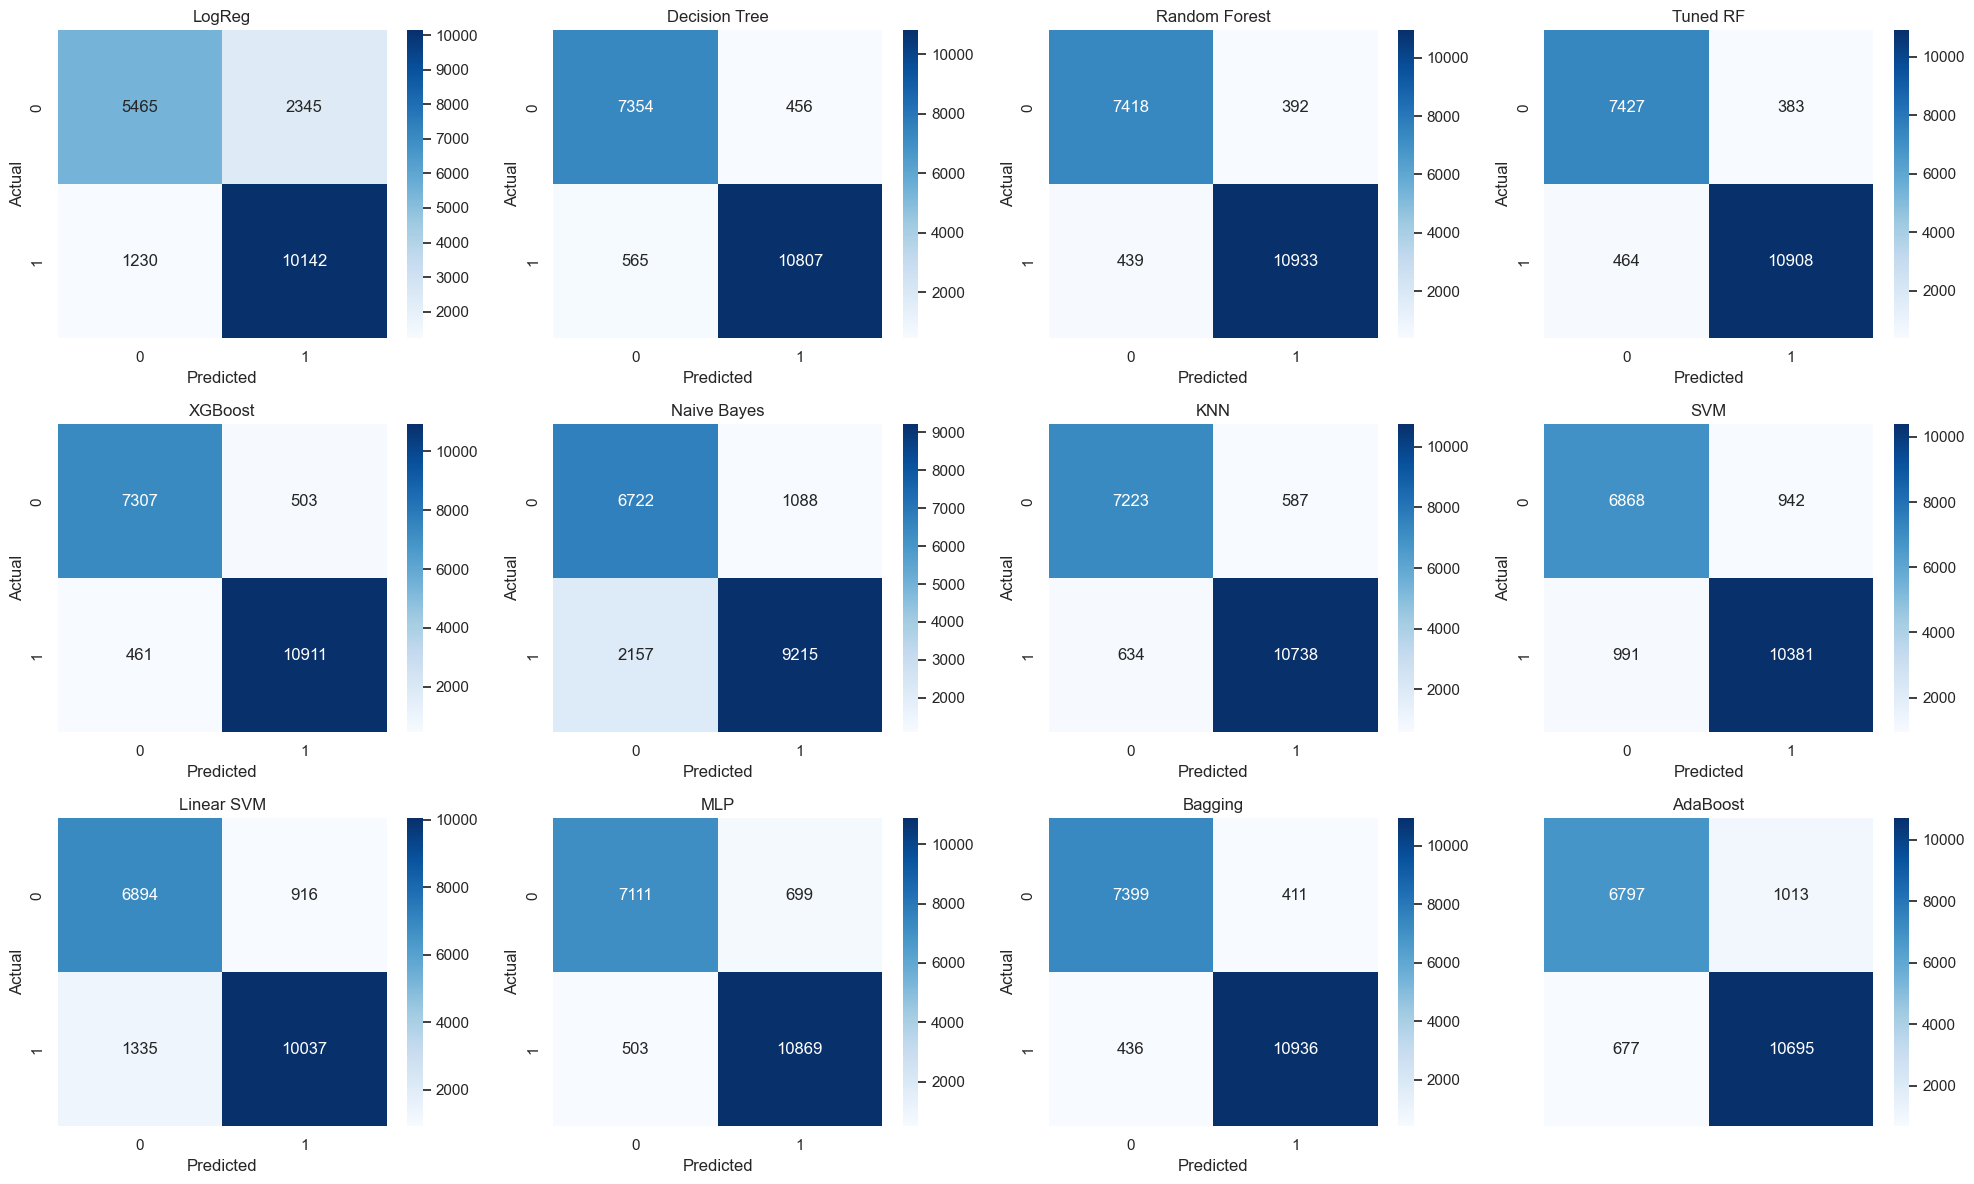

In [24]:
model_preds = {
    "LogReg": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Tuned RF": y_pred_best_rf,
    "XGBoost": y_pred_xgb,
    "Naive Bayes": y_pred_nb,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "Linear SVM": y_pred_linear_svm,
    "MLP": y_pred_mlp,
    "Bagging": y_pred_bag,
    "AdaBoost": y_pred_ada
}

fig, axes = plt.subplots(3, 4, figsize=(20, 12))
for i, (name, pred) in enumerate(model_preds.items()):
    r, c = divmod(i, 4)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[r, c], cmap="Blues")
    axes[r, c].set_title(name)
    axes[r, c].set_xlabel("Predicted")
    axes[r, c].set_ylabel("Actual")
axes[2, 3].axis("off")
plt.tight_layout()
plt.show()


# 9. ROC Curve Comparison


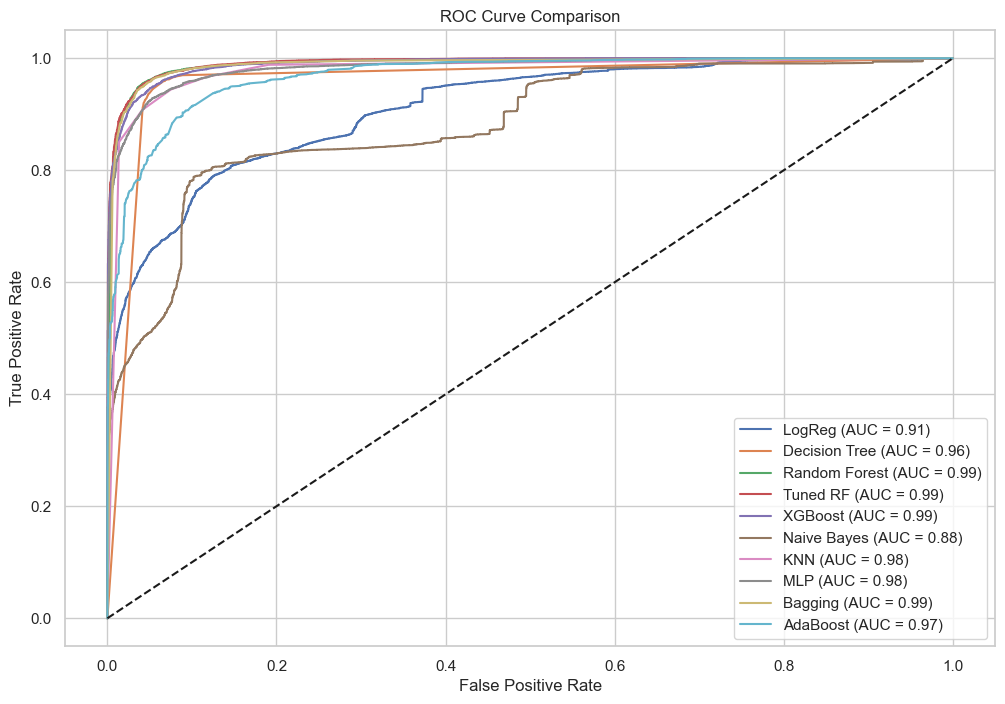

In [25]:
model_probs = {
    "LogReg": lr.predict_proba(X_test)[:, 1],
    "Decision Tree": dt.predict_proba(X_test)[:, 1],
    "Random Forest": rf.predict_proba(X_test)[:, 1],
    "Tuned RF": best_rf.predict_proba(X_test)[:, 1],
    "XGBoost": xgb.predict_proba(X_test)[:, 1],
    "Naive Bayes": nb.predict_proba(X_test)[:, 1],
    "KNN": knn.predict_proba(X_test_scaled)[:, 1],
    "MLP": mlp.predict_proba(X_test_scaled)[:, 1],
    "Bagging": bag.predict_proba(X_test)[:, 1],
    "AdaBoost": ada.predict_proba(X_test)[:, 1]
}

plt.figure(figsize=(12, 8))
for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# 10. Decision Tree Visualization

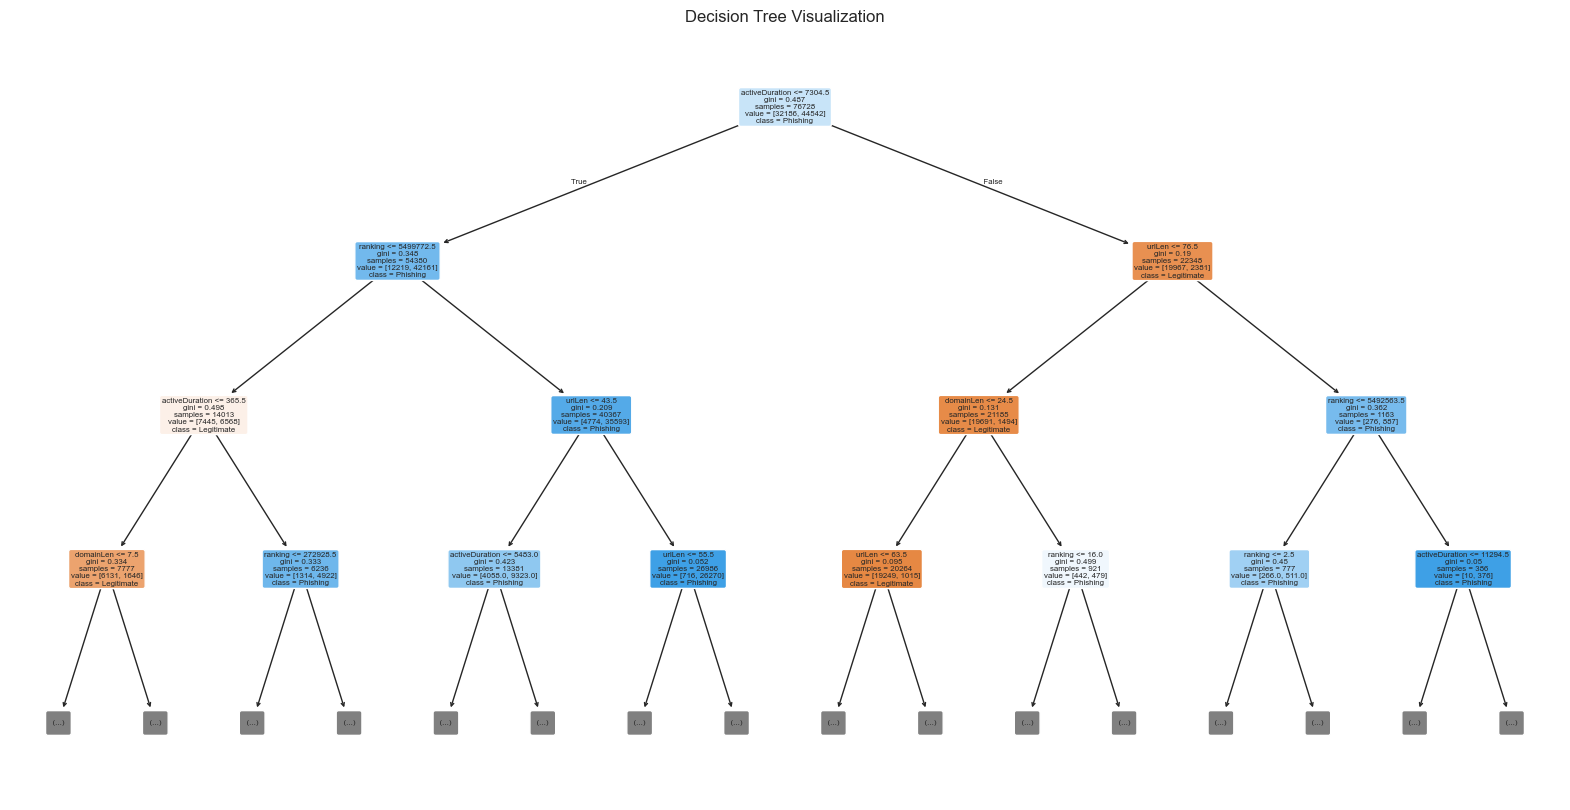

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(dt,
          feature_names=X.columns,
          class_names=["Legitimate", "Phishing"],
          filled=True, rounded=True, max_depth=3)  # Limit depth for readability
plt.title("Decision Tree Visualization")
plt.show()


# 11. Feature Importance

### Random Forest Feature Importance

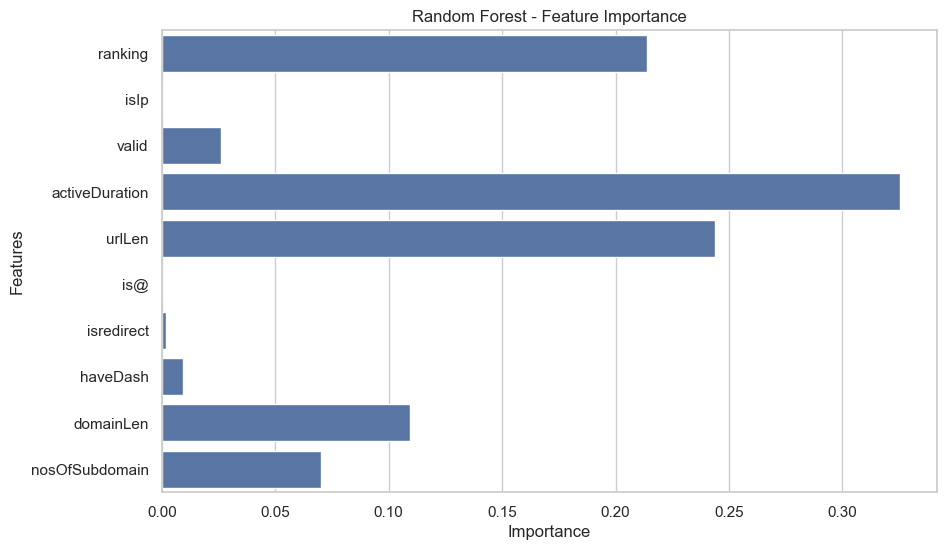

In [27]:
importances_rf = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=features)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


### XGBoost Feature Importance

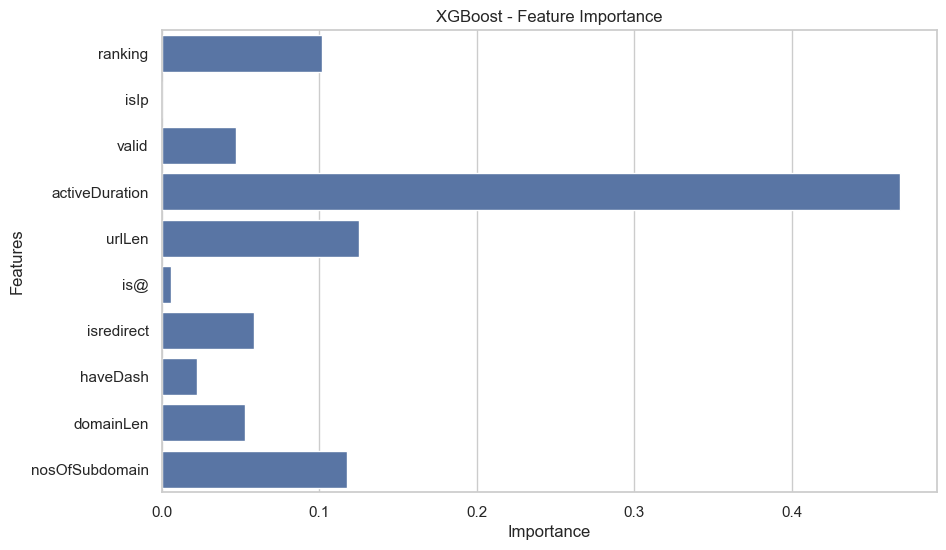

In [28]:
importances_xgb = xgb.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_xgb, y=features)
plt.title("XGBoost - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# 12. Conclusion

This project successfully demonstrated how machine learning can be applied to detect phishing websites based on URL and domain features. We explored a wide variety of data mining algorithms — including logistic regression, decision trees, SVM, ensemble methods like Random Forest and XGBoost, as well as a basic neural network.

Through careful preprocessing, exploratory analysis, and evaluation using metrics like F1 score, accuracy, and AUC, we found that ensemble models performed the best. In particular, **Random Forest, XGBoost, and AdaBoost** achieved over 95% accuracy and strong generalization.

This project not only allowed us to compare a large set of algorithms but also gave us valuable insights into how features like `urlLen`, `ranking`, and `haveDash` contribute to detecting phishing behavior.

Overall, we achieved our goal of building a robust, data-driven classifier with strong performance and solid interpretability.


# 13. Future Work

While our current approach yields excellent results, there are several areas for future improvement and exploration:

- **Textual Feature Engineering**: Extract and analyze domain names, subdomains, and full URLs using NLP techniques to capture patterns and linguistic cues.
- **Content-Based Detection**: Integrate content signals like HTML structure, JavaScript activity, or SSL certificate info to expand the feature space.
- **Time-Series or Online Learning**: Phishing behavior changes frequently — exploring models that can adapt to new data over time would be valuable.
- **Advanced Deep Learning**: Use LSTM or Transformer-based models to analyze raw URLs or webpage sequences for complex phishing tactics.
- **Real-Time Application**: Wrap the model into an API or browser extension to flag phishing websites in real-time as users browse.

These additions could further enhance the effectiveness and deployability of phishing detection systems.
